In [1]:
#! -*- coding: UTF8 -*-
import os
os.chdir(os.getcwd())

## Import Module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
import matplotlib as mpl
%matplotlib inline
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

## Import Data

In [4]:
df = pd.read_excel('process_data/GPP_6210501001_real.xlsx',sheet_name="SingBuri",index_col="Year") #ตัวอย่าง
df.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดสิงห์บุรี (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สวนผักและไม้ดอก (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht)
Year,,,,,,,,,,,,,,,,,,,,,
1995,1517.167364,42.410974,2247.735336,251.360573,20.751178,540.088489,1553.350483,662.278852,43.742963,80.752569,...,48.223830,37.278020,59467272,0.11918,12384.870133,407634.682481,2134.568256,342336.266980,10,143862.554
1996,2151.732729,39.837997,2525.526291,268.322033,21.818723,412.596415,1778.579003,737.967580,37.939543,90.268175,...,45.255728,37.081286,60130190,0.11918,13039.348373,414866.326298,2150.253635,342215.983314,10,171503.917
1997,2438.909192,28.967616,2434.777758,282.656660,23.104803,399.625836,1934.577471,790.819202,44.211324,89.376423,...,46.814732,36.564600,60846588,0.10214,13222.127602,416885.941624,2154.634165,342182.391127,10,179223.451
1998,2872.227679,23.722862,2635.233786,362.892721,23.570355,241.360017,1787.959114,724.545611,45.740985,87.423898,...,42.303171,36.111727,61585103,0.17525,13255.000370,417249.168605,2155.422002,342176.349586,10,180611.806
1999,1738.973389,18.169377,2775.669860,310.675285,26.850346,240.759815,1607.285461,736.278279,63.183246,98.627151,...,44.267746,36.378900,62298569,0.24836,13473.896446,419667.856278,2160.668116,342136.119643,10,189856.706


## Principal Component Analysis : Scikit-Learn

In [5]:
X = df.drop('GPP Per capita (Baht)',1)
y = df['GPP Per capita (Baht)']

/var/folders/37/ffyx67ps24v157rdzs_y3pkc0000gn/T/ipykernel_5924/3021477077.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('GPP Per capita (Baht)',1)


In [6]:
# Split data into training and test sets using ratio = 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [7]:
# First, compute mean and SD 
mean_X_train = X_train.mean()
std_X_train = X_train.std()

In [8]:
# Normalize the input matrix for training data
scaled_X_train = (X_train-mean_X_train)/std_X_train
scaled_X_train

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี),การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดสิงห์บุรี (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สวนผักและไม้ดอก (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน)
Year,,,,,,,,,,,,,,,,,,,,,
1999,-1.112213,-1.061419,-1.459161,-1.187658,-0.812727,-1.551110,-1.023406,1.695207,-1.506147,-2.031106,...,-0.565718,-1.994533,-0.725911,-1.323263,-0.487482,-1.032942,-1.244240,-1.189027,-0.538193,0.988632
2017,0.285184,0.227897,0.726995,1.060482,2.241668,1.093914,1.853512,2.047924,1.397537,1.059914,...,-1.085901,-0.663574,-1.737192,1.240212,2.613591,1.102151,1.195099,1.515892,1.242978,-1.271099
1995,-1.298644,0.112680,-1.702834,-1.481982,-0.980160,-0.099911,-1.113277,0.262679,-2.420023,-2.519337,...,-0.364491,-1.465393,-0.057403,-2.373429,-1.019179,-1.375439,-1.650863,-1.569954,-0.418879,0.988632
2015,-0.351736,1.185049,0.722411,1.108632,1.967256,0.924025,0.780368,-0.561053,0.600904,0.704112,...,-0.587390,-0.264403,-0.874407,1.056499,1.026073,1.691528,1.178034,1.618057,1.291264,-1.271099
2016,-0.509343,0.477317,0.896680,1.037226,1.414439,1.082599,1.192514,0.573155,0.982040,0.306192,...,-1.009288,-0.759107,-1.314873,1.151748,1.693185,0.824977,1.177088,1.545082,1.314513,1.553565
2004,-0.281872,-1.205081,-0.356134,-0.622964,-0.617252,-0.778126,-0.762926,-0.791195,1.107934,0.440259,...,-0.140113,0.302315,0.406758,-0.323008,-0.528970,-0.423008,-0.520107,-0.510654,-0.750673,0.423700
2013,2.171808,0.761778,0.840921,1.397388,0.003863,1.285043,1.171474,-1.296729,0.041147,0.846477,...,2.031246,0.817415,-0.339516,0.845079,0.308047,1.685678,1.173371,0.280306,1.238208,-0.141233
2008,1.837765,0.863414,0.594534,-0.048007,-0.462968,0.121618,0.498047,0.803914,0.401333,-0.009226,...,0.695164,1.316243,1.579509,0.246595,-0.672905,-0.932899,0.954447,0.870717,-1.183347,-0.706166
2003,-0.614960,-1.219252,-0.506710,-0.891912,-0.712844,-1.218432,-0.985420,-1.540050,-0.125303,0.393491,...,0.020507,-0.536284,0.418560,-0.488226,-0.499912,-0.534870,-0.652913,-0.635068,-0.711704,0.423700


In [9]:
# Compute covariance matrix of normalized input
cov_scaled_X_train = np.cov(scaled_X_train.T)
cov_scaled_X_train.shape

# Notice that original dimension of variables = p = 4
# Hence, covariance matrix has size = pxp = 4x4

(30, 30)

In [10]:
# Compute eigenvalues and eigenvectors of covariance matrix
from numpy.linalg import eig

eig_values, eig_vectors = eig(cov_scaled_X_train)
eig_values.shape

# Results have 4 eigenvalues

(30,)

In [11]:
# Results have 4 correponding eigenvectors

eig_vectors.shape

(30, 30)

In [12]:
# Matching each pair of eigenvalue and eigenvector and store them in eig_pairs
# Sort eig_pairs using eigenvalues from max to min

eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs

[(17.328489012067052,
  array([ 0.14761621+0.j,  0.15415801+0.j,  0.21708301+0.j,  0.23222951+0.j,
          0.1986792 +0.j,  0.20598612+0.j,  0.23059577+0.j, -0.01094761+0.j,
          0.18962594+0.j,  0.19510344+0.j,  0.20354246+0.j,  0.14147197+0.j,
          0.19570337+0.j,  0.21157784+0.j,  0.08755959+0.j,  0.22137063+0.j,
          0.21989947+0.j,  0.19634428+0.j,  0.18840203+0.j,  0.11083379+0.j,
          0.06165672+0.j,  0.09617011+0.j, -0.0658411 +0.j,  0.23322003+0.j,
          0.19495132+0.j,  0.21623326+0.j,  0.22554681+0.j,  0.22094228+0.j,
          0.18633909+0.j, -0.13172799+0.j])),
 (5.544524057321664,
  array([ 0.24096735+0.j,  0.05008761+0.j,  0.1213225 +0.j,  0.02039815+0.j,
         -0.19278856+0.j, -0.01316076+0.j, -0.04195581+0.j, -0.22888889+0.j,
          0.09800755+0.j,  0.15816874+0.j, -0.13101035+0.j,  0.16430741+0.j,
         -0.16052136+0.j,  0.08841556+0.j,  0.30686981+0.j, -0.07668519+0.j,
         -0.08982592+0.j,  0.01281104+0.j, -0.24328297+0.j,  0.3

In [13]:
# First, obtain mean and variance of input matrix of traning data
# (Later on, mean and SD will be used to normalize input matrix.)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [14]:
# Show mean of input matrix of training data, computed by Scikit-Learn

scaler.mean_

array([3.06222236e+03, 4.00844631e+01, 5.93703483e+03, 5.50022394e+02,
       5.64558773e+01, 5.60696356e+02, 2.22147149e+03, 6.48709753e+02,
       9.52225278e+01, 1.72987758e+02, 8.94755856e+02, 7.96580503e+02,
       1.61073581e+00, 2.57575746e+01, 9.53111324e+02, 2.18151836e+03,
       8.03967323e+02, 6.43466211e+01, 2.57415796e+02, 1.06305638e+02,
       9.42217249e+00, 5.91797705e+01, 3.73552258e+01, 6.58661476e+07,
       3.66797500e-01, 1.67583073e+04, 4.56488534e+05, 2.24213621e+03,
       3.43038929e+05, 8.25000000e+00])

In [15]:
# Show mean of input matrix of training data, computed manually earlier

mean_X_train

Agriculture, forestry and fishing                                      3.062222e+03
Mining and quarrying                                                   4.008446e+01
Manufacturing                                                          5.937035e+03
Electricity, gas, steam and air conditioning supply                    5.500224e+02
Water supply; sewerage, waste management and remediation activities    5.645588e+01
Construction                                                           5.606964e+02
Wholesale and retail trade and repair of motor vehicles                2.221471e+03
Transportation and storage                                             6.487098e+02
Accommodation and food service activities                              9.522253e+01
Information and communication                                          1.729878e+02
Financial and insurance activities                                     8.947559e+02
Real estate activities                                                 7.965

In [16]:
# Show SD of input matrix of training data, computed by Scikit-Learn 

np.sqrt(scaler.var_)

array([1.15196506e+03, 1.99913452e+01, 2.09776662e+03, 1.95129323e+02,
       3.52706940e+01, 1.99713297e+02, 5.81082036e+02, 5.00162261e+01,
       2.05968556e+01, 3.54483523e+01, 3.68648156e+02, 1.41090065e+02,
       1.20421853e+00, 1.30618230e+01, 1.91410682e+02, 1.34078703e+03,
       2.08811991e+02, 3.16315782e+01, 2.97230463e+02, 1.25125684e+01,
       9.05704351e-01, 7.23904230e+00, 1.30225866e+00, 2.61043560e+06,
       2.35242937e-01, 3.07869848e+03, 2.86532177e+04, 6.63409256e+01,
       1.62421404e+03, 1.71391365e+00])

In [17]:
# Show SD of input matrix of training data, computed manually earlier

std_X_train

# SD's computed by Scikit-Learn and by manually have little difference
# This will contribute to the difference in eigenvalues later

Agriculture, forestry and fishing                                      1.189744e+03
Mining and quarrying                                                   2.064697e+01
Manufacturing                                                          2.166564e+03
Electricity, gas, steam and air conditioning supply                    2.015287e+02
Water supply; sewerage, waste management and remediation activities    3.642742e+01
Construction                                                           2.062630e+02
Wholesale and retail trade and repair of motor vehicles                6.001389e+02
Transportation and storage                                             5.165654e+01
Accommodation and food service activities                              2.127234e+01
Information and communication                                          3.661090e+01
Financial and insurance activities                                     3.807382e+02
Real estate activities                                                 1.457

In [18]:
# Normalize input matrix for training data set using mean and SD (by using function transform)
# Then, use the same mean and SD from train to normalize input matrix for test data set

sk_scaled_X_train = scaler.transform(X_train)
sk_scaled_X_test = scaler.transform(X_test)

# Note that: 
# scaler = StandardScaler().fit(X_train)
# sk_scaled_X_train = scaler.transform(X_train)
# are equivalent to:
# scaler = StandardScaler()
# sk_scaled_X_train = scaler.fit_transform(X_train)

#### components = 2

In [19]:
# Select number of principal components and perform PCA
# From manual steps, we know that number of selected principal components should be 2.
# On the other hand, you can perform PCA multiple times with different numbers of principal components
# and check explained_variance_ratio_ afterward to find appropriate number of selected principal components

from sklearn.decomposition import PCA

num_components=2
pca2 = PCA(n_components=num_components)
pca2.fit(sk_scaled_X_train)

PCA(n_components=2)

In [20]:
# Show variances (or eigenvalues) of selected components

pca2.explained_variance_

array([18.48372161,  5.91415899])

In [21]:
# Show principal components (or eigenvectors) of selected components

pca2.components_

array([[-0.14761621, -0.15415801, -0.21708301, -0.23222951, -0.1986792 ,
        -0.20598612, -0.23059577,  0.01094761, -0.18962594, -0.19510344,
        -0.20354246, -0.14147197, -0.19570337, -0.21157784, -0.08755959,
        -0.22137063, -0.21989947, -0.19634428, -0.18840203, -0.11083379,
        -0.06165672, -0.09617011,  0.0658411 , -0.23322003, -0.19495132,
        -0.21623326, -0.22554681, -0.22094228, -0.18633909,  0.13172799],
       [-0.24096735, -0.05008761, -0.1213225 , -0.02039815,  0.19278856,
         0.01316076,  0.04195581,  0.22888889, -0.09800755, -0.15816874,
         0.13101035, -0.16430741,  0.16052136, -0.08841556, -0.30686981,
         0.07668519,  0.08982592, -0.01281104,  0.24328297, -0.35249838,
        -0.28091161, -0.36519144, -0.35753399, -0.04852132,  0.23075595,
         0.03730085, -0.003568  ,  0.04124513,  0.16549262,  0.05005209]])

In [22]:
# Compare results from explained_variance_ and components_ from Scikit-learn
# to eig_paris from manual steps

eig_pairs

[(17.328489012067052,
  array([ 0.14761621+0.j,  0.15415801+0.j,  0.21708301+0.j,  0.23222951+0.j,
          0.1986792 +0.j,  0.20598612+0.j,  0.23059577+0.j, -0.01094761+0.j,
          0.18962594+0.j,  0.19510344+0.j,  0.20354246+0.j,  0.14147197+0.j,
          0.19570337+0.j,  0.21157784+0.j,  0.08755959+0.j,  0.22137063+0.j,
          0.21989947+0.j,  0.19634428+0.j,  0.18840203+0.j,  0.11083379+0.j,
          0.06165672+0.j,  0.09617011+0.j, -0.0658411 +0.j,  0.23322003+0.j,
          0.19495132+0.j,  0.21623326+0.j,  0.22554681+0.j,  0.22094228+0.j,
          0.18633909+0.j, -0.13172799+0.j])),
 (5.544524057321664,
  array([ 0.24096735+0.j,  0.05008761+0.j,  0.1213225 +0.j,  0.02039815+0.j,
         -0.19278856+0.j, -0.01316076+0.j, -0.04195581+0.j, -0.22888889+0.j,
          0.09800755+0.j,  0.15816874+0.j, -0.13101035+0.j,  0.16430741+0.j,
         -0.16052136+0.j,  0.08841556+0.j,  0.30686981+0.j, -0.07668519+0.j,
         -0.08982592+0.j,  0.01281104+0.j, -0.24328297+0.j,  0.3

In [23]:
# Show explained_variance_ratio_  (or percent of transformation along each component)

pca2.explained_variance_ratio_

array([0.5776163 , 0.18481747])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

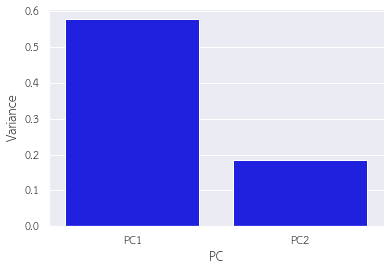

In [24]:
# Plot to see explained_variance_ratio_ using bar graph

temp_df = pd.DataFrame({'Variance':pca2.explained_variance_ratio_,
                        'PC':['PC1','PC2']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [25]:
# Transform input data of original matrix to the new space

sk_X_train_transformed  = pca2.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

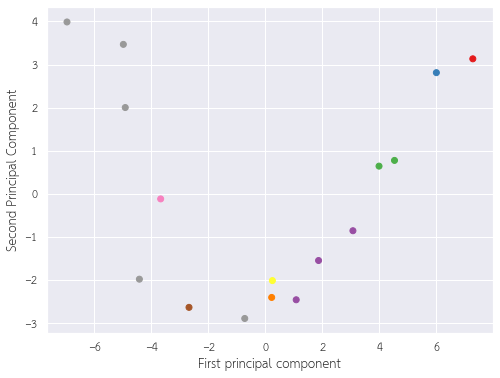

In [26]:
# Plot the new space with the transformed input data

plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [27]:
# The transformed data can also be converted back to the original data
# Since we use new space with lower dimension, 
# the derived X_train will not be the same as the original X_train

sk_derived_X_train = pca2.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-4.14840451e-01,  3.05657664e-02, -1.36551200e-01,
        -2.23829012e-01,  1.90072729e-01,  4.03394553e-01,
        -2.08212137e-01, -1.04107320e+00,  1.42283874e-01,
         4.82316702e-01,  5.31913408e-01, -8.10453917e-01,
         1.09177272e-01,  2.02237795e-01, -4.04580454e-02,
        -1.76741184e-01, -1.81788829e-01,  3.93265583e-02,
         2.28361747e-01, -2.68089602e-02, -5.76022785e-01,
         4.55469081e-01,  1.38620580e-01, -1.68852440e-01,
        -1.66423960e-02, -1.25307965e-01, -7.79474041e-02,
         1.87470528e-02, -9.62480693e-02, -9.00394613e-02],
       [-2.29786768e-01,  6.36141443e-01,  2.73844169e-01,
         4.37201356e-01, -1.65600493e-01,  3.54147511e-01,
        -1.44497432e-01, -1.27826726e+00, -5.16505706e-01,
        -3.69691220e-01,  2.30233299e-01, -4.72394568e-01,
        -9.73465037e-01, -3.73663068e-01, -4.56442360e-01,
         5.73487677e-01,  6.40109030e-02, -4.76881248e-01,
        -4.48441419e-02, -1.63214867e-01,  4.29597582e-

<AxesSubplot:>

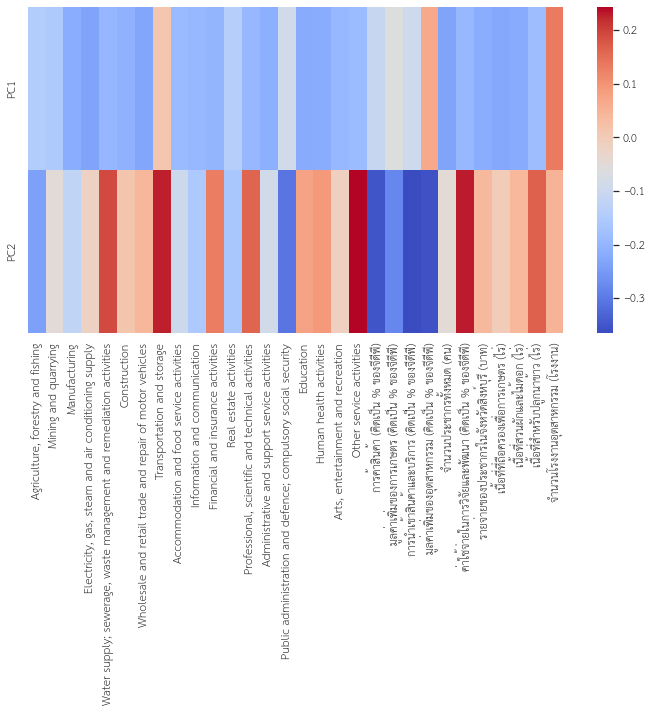

In [28]:
# Plot to see correlation between selected principal components and original variables

temp_df3 = pd.DataFrame(pca2.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

# The result shows that principal component 1 correlates with sepal length, petal width, petal length
# Principal component 2 correlates with petal width and petal length

#### components = 3

In [29]:
num_components=3
pca3 = PCA(n_components=num_components)
pca3.fit(sk_scaled_X_train)

PCA(n_components=3)

In [30]:
pca3.explained_variance_

array([18.48372161,  5.91415899,  2.50417552])

In [31]:
pca3.components_

array([[-0.14761621, -0.15415801, -0.21708301, -0.23222951, -0.1986792 ,
        -0.20598612, -0.23059577,  0.01094761, -0.18962594, -0.19510344,
        -0.20354246, -0.14147197, -0.19570337, -0.21157784, -0.08755959,
        -0.22137063, -0.21989947, -0.19634428, -0.18840203, -0.11083379,
        -0.06165672, -0.09617011,  0.0658411 , -0.23322003, -0.19495132,
        -0.21623326, -0.22554681, -0.22094228, -0.18633909,  0.13172799],
       [-0.24096735, -0.05008761, -0.1213225 , -0.02039815,  0.19278856,
         0.01316076,  0.04195581,  0.22888889, -0.09800755, -0.15816874,
         0.13101035, -0.16430741,  0.16052136, -0.08841556, -0.30686981,
         0.07668519,  0.08982592, -0.01281104,  0.24328297, -0.35249838,
        -0.28091161, -0.36519144, -0.35753399, -0.04852132,  0.23075595,
         0.03730085, -0.003568  ,  0.04124513,  0.16549262,  0.05005209],
       [ 0.1899453 ,  0.37297168,  0.08865202,  0.11143548, -0.11628027,
         0.26708337,  0.10279436, -0.1068049 , -0

In [32]:
eig_pairs

[(17.328489012067052,
  array([ 0.14761621+0.j,  0.15415801+0.j,  0.21708301+0.j,  0.23222951+0.j,
          0.1986792 +0.j,  0.20598612+0.j,  0.23059577+0.j, -0.01094761+0.j,
          0.18962594+0.j,  0.19510344+0.j,  0.20354246+0.j,  0.14147197+0.j,
          0.19570337+0.j,  0.21157784+0.j,  0.08755959+0.j,  0.22137063+0.j,
          0.21989947+0.j,  0.19634428+0.j,  0.18840203+0.j,  0.11083379+0.j,
          0.06165672+0.j,  0.09617011+0.j, -0.0658411 +0.j,  0.23322003+0.j,
          0.19495132+0.j,  0.21623326+0.j,  0.22554681+0.j,  0.22094228+0.j,
          0.18633909+0.j, -0.13172799+0.j])),
 (5.544524057321664,
  array([ 0.24096735+0.j,  0.05008761+0.j,  0.1213225 +0.j,  0.02039815+0.j,
         -0.19278856+0.j, -0.01316076+0.j, -0.04195581+0.j, -0.22888889+0.j,
          0.09800755+0.j,  0.15816874+0.j, -0.13101035+0.j,  0.16430741+0.j,
         -0.16052136+0.j,  0.08841556+0.j,  0.30686981+0.j, -0.07668519+0.j,
         -0.08982592+0.j,  0.01281104+0.j, -0.24328297+0.j,  0.3

In [33]:
pca3.explained_variance_ratio_

array([0.5776163 , 0.18481747, 0.07825548])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

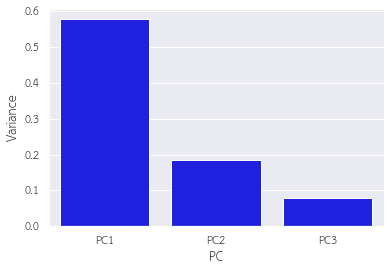

In [34]:
temp_df = pd.DataFrame({'Variance':pca3.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [35]:
sk_X_train_transformed  = pca3.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

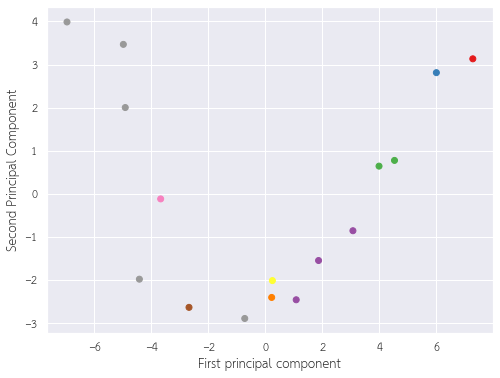

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [37]:
sk_derived_X_train = pca3.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-4.15072671e-01,  3.01097866e-02, -1.36659582e-01,
        -2.23965248e-01,  1.90214889e-01,  4.03068028e-01,
        -2.08337809e-01, -1.04094262e+00,  1.42665405e-01,
         4.82573366e-01,  5.31705139e-01, -8.10105096e-01,
         1.09387700e-01,  2.02265693e-01, -4.00758800e-02,
        -1.76933115e-01, -1.81647497e-01,  3.95980948e-02,
         2.28481114e-01, -2.66583190e-02, -5.76449174e-01,
         4.55475380e-01,  1.38561493e-01, -1.68759704e-01,
        -1.65103487e-02, -1.25395435e-01, -7.80166300e-02,
         1.88011319e-02, -9.64713692e-02, -8.98630118e-02],
       [-5.55117211e-01, -2.66900546e-03,  1.22004660e-01,
         2.46339282e-01,  3.35595330e-02, -1.03301831e-01,
        -3.20559351e-01, -1.09533625e+00,  1.80056626e-02,
        -1.01146543e-02, -6.15430766e-02,  1.62896783e-02,
        -6.78663905e-01, -3.34579982e-01,  7.89569091e-02,
         3.04600341e-01,  2.62011616e-01, -9.64688885e-02,
         1.22384763e-01,  4.78277827e-02, -1.67757134e-

<AxesSubplot:>

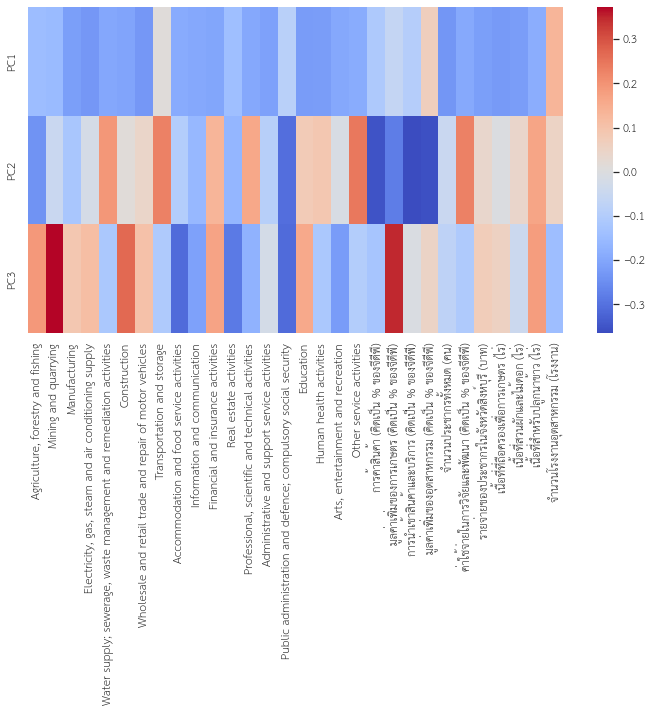

In [38]:
temp_df3 = pd.DataFrame(pca3.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 4

In [39]:
num_components=4
pca4 = PCA(n_components=num_components)
pca4.fit(sk_scaled_X_train)

PCA(n_components=4)

In [40]:
pca4.explained_variance_

array([18.48372161,  5.91415899,  2.50417552,  1.55859   ])

In [41]:
pca4.components_

array([[-0.14761621, -0.15415801, -0.21708301, -0.23222951, -0.1986792 ,
        -0.20598612, -0.23059577,  0.01094761, -0.18962594, -0.19510344,
        -0.20354246, -0.14147197, -0.19570337, -0.21157784, -0.08755959,
        -0.22137063, -0.21989947, -0.19634428, -0.18840203, -0.11083379,
        -0.06165672, -0.09617011,  0.0658411 , -0.23322003, -0.19495132,
        -0.21623326, -0.22554681, -0.22094228, -0.18633909,  0.13172799],
       [-0.24096735, -0.05008761, -0.1213225 , -0.02039815,  0.19278856,
         0.01316076,  0.04195581,  0.22888889, -0.09800755, -0.15816874,
         0.13101035, -0.16430741,  0.16052136, -0.08841556, -0.30686981,
         0.07668519,  0.08982592, -0.01281104,  0.24328297, -0.35249838,
        -0.28091161, -0.36519144, -0.35753399, -0.04852132,  0.23075595,
         0.03730085, -0.003568  ,  0.04124513,  0.16549262,  0.05005209],
       [ 0.1899453 ,  0.37297168,  0.08865202,  0.11143548, -0.11628027,
         0.26708337,  0.10279436, -0.1068049 , -0

In [42]:
eig_pairs

[(17.328489012067052,
  array([ 0.14761621+0.j,  0.15415801+0.j,  0.21708301+0.j,  0.23222951+0.j,
          0.1986792 +0.j,  0.20598612+0.j,  0.23059577+0.j, -0.01094761+0.j,
          0.18962594+0.j,  0.19510344+0.j,  0.20354246+0.j,  0.14147197+0.j,
          0.19570337+0.j,  0.21157784+0.j,  0.08755959+0.j,  0.22137063+0.j,
          0.21989947+0.j,  0.19634428+0.j,  0.18840203+0.j,  0.11083379+0.j,
          0.06165672+0.j,  0.09617011+0.j, -0.0658411 +0.j,  0.23322003+0.j,
          0.19495132+0.j,  0.21623326+0.j,  0.22554681+0.j,  0.22094228+0.j,
          0.18633909+0.j, -0.13172799+0.j])),
 (5.544524057321664,
  array([ 0.24096735+0.j,  0.05008761+0.j,  0.1213225 +0.j,  0.02039815+0.j,
         -0.19278856+0.j, -0.01316076+0.j, -0.04195581+0.j, -0.22888889+0.j,
          0.09800755+0.j,  0.15816874+0.j, -0.13101035+0.j,  0.16430741+0.j,
         -0.16052136+0.j,  0.08841556+0.j,  0.30686981+0.j, -0.07668519+0.j,
         -0.08982592+0.j,  0.01281104+0.j, -0.24328297+0.j,  0.3

In [43]:
pca4.explained_variance_ratio_

array([0.5776163 , 0.18481747, 0.07825548, 0.04870594])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

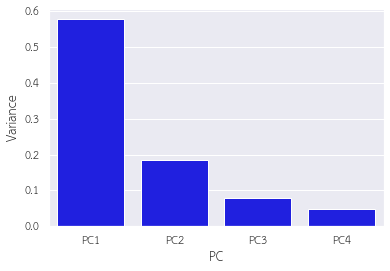

In [44]:
temp_df = pd.DataFrame({'Variance':pca4.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [45]:
sk_X_train_transformed  = pca4.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

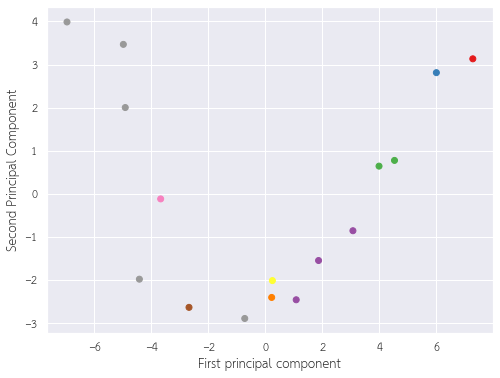

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [47]:
sk_derived_X_train = pca4.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-3.68540770e-01,  1.38449596e-01, -1.32065428e-01,
        -2.52998356e-01,  2.01462318e-01,  4.41789271e-01,
        -1.66299395e-01, -8.23734523e-01,  1.51462795e-01,
         4.16315160e-01,  5.75444329e-01, -7.84772543e-01,
         1.11564794e-01,  2.91812458e-01, -6.44892918e-02,
        -2.39896158e-01, -1.96192446e-01,  1.82199534e-02,
         2.54325780e-01, -1.74586784e-02, -6.45082951e-01,
         4.62448820e-01,  2.51244483e-01, -1.78460824e-01,
        -2.75143405e-02, -2.31712279e-01, -5.12961070e-02,
         8.59260786e-02, -2.10115795e-01, -9.23478449e-02],
       [-4.11223219e-01,  3.32358092e-01,  1.36211497e-01,
         1.56558084e-01,  6.83407786e-02,  1.64386913e-02,
        -1.90560895e-01, -4.23647799e-01,  4.52104725e-02,
        -2.15009738e-01,  7.37148123e-02,  9.46273817e-02,
        -6.71931520e-01, -5.76679867e-02,  3.46153459e-03,
         1.09895126e-01,  2.17033210e-01, -1.62578075e-01,
         2.02306111e-01,  7.62765024e-02, -3.79998371e-

<AxesSubplot:>

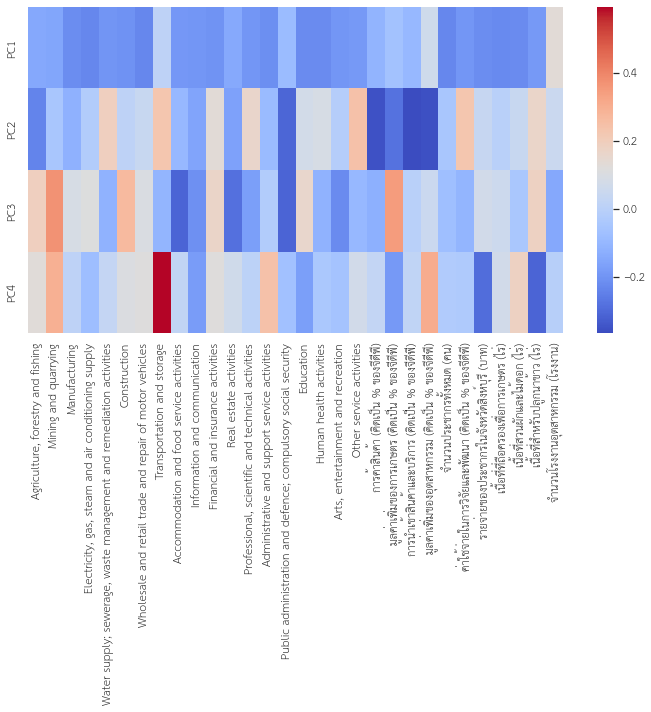

In [48]:
temp_df3 = pd.DataFrame(pca4.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 5

In [49]:
num_components=5
pca5 = PCA(n_components=num_components)
pca5.fit(sk_scaled_X_train)

PCA(n_components=5)

In [50]:
pca5.explained_variance_

array([18.48372161,  5.91415899,  2.50417552,  1.55859   ,  0.94497378])

In [51]:
pca5.components_

array([[-0.14761621, -0.15415801, -0.21708301, -0.23222951, -0.1986792 ,
        -0.20598612, -0.23059577,  0.01094761, -0.18962594, -0.19510344,
        -0.20354246, -0.14147197, -0.19570337, -0.21157784, -0.08755959,
        -0.22137063, -0.21989947, -0.19634428, -0.18840203, -0.11083379,
        -0.06165672, -0.09617011,  0.0658411 , -0.23322003, -0.19495132,
        -0.21623326, -0.22554681, -0.22094228, -0.18633909,  0.13172799],
       [-0.24096735, -0.05008761, -0.1213225 , -0.02039815,  0.19278856,
         0.01316076,  0.04195581,  0.22888889, -0.09800755, -0.15816874,
         0.13101035, -0.16430741,  0.16052136, -0.08841556, -0.30686981,
         0.07668519,  0.08982592, -0.01281104,  0.24328297, -0.35249838,
        -0.28091161, -0.36519144, -0.35753399, -0.04852132,  0.23075595,
         0.03730085, -0.003568  ,  0.04124513,  0.16549262,  0.05005209],
       [ 0.1899453 ,  0.37297168,  0.08865202,  0.11143548, -0.11628027,
         0.26708337,  0.10279436, -0.1068049 , -0

In [52]:
eig_pairs

[(17.328489012067052,
  array([ 0.14761621+0.j,  0.15415801+0.j,  0.21708301+0.j,  0.23222951+0.j,
          0.1986792 +0.j,  0.20598612+0.j,  0.23059577+0.j, -0.01094761+0.j,
          0.18962594+0.j,  0.19510344+0.j,  0.20354246+0.j,  0.14147197+0.j,
          0.19570337+0.j,  0.21157784+0.j,  0.08755959+0.j,  0.22137063+0.j,
          0.21989947+0.j,  0.19634428+0.j,  0.18840203+0.j,  0.11083379+0.j,
          0.06165672+0.j,  0.09617011+0.j, -0.0658411 +0.j,  0.23322003+0.j,
          0.19495132+0.j,  0.21623326+0.j,  0.22554681+0.j,  0.22094228+0.j,
          0.18633909+0.j, -0.13172799+0.j])),
 (5.544524057321664,
  array([ 0.24096735+0.j,  0.05008761+0.j,  0.1213225 +0.j,  0.02039815+0.j,
         -0.19278856+0.j, -0.01316076+0.j, -0.04195581+0.j, -0.22888889+0.j,
          0.09800755+0.j,  0.15816874+0.j, -0.13101035+0.j,  0.16430741+0.j,
         -0.16052136+0.j,  0.08841556+0.j,  0.30686981+0.j, -0.07668519+0.j,
         -0.08982592+0.j,  0.01281104+0.j, -0.24328297+0.j,  0.3

In [53]:
pca5.explained_variance_ratio_

array([0.5776163 , 0.18481747, 0.07825548, 0.04870594, 0.02953043])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

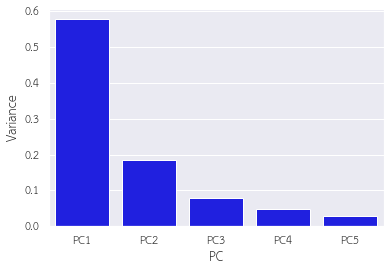

In [54]:
temp_df = pd.DataFrame({'Variance':pca5.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [55]:
sk_X_train_transformed  = pca5.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

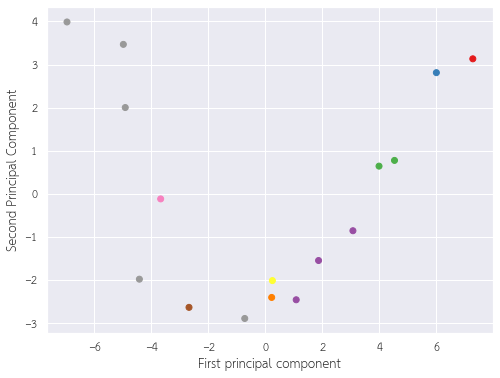

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [57]:
sk_derived_X_train = pca5.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-3.17254927e-01,  1.04576200e-01, -1.76004322e-01,
        -2.45732640e-01,  2.11056181e-01,  4.01320054e-01,
        -1.67066485e-01, -8.05010091e-01,  1.46927610e-01,
         4.26188462e-01,  5.49143163e-01, -7.70502332e-01,
         9.22527005e-02,  2.45031981e-01, -1.05842165e-01,
        -2.23952065e-01, -1.52351973e-01, -8.19397945e-03,
         2.25540138e-01,  4.15155277e-03, -6.92968213e-01,
         4.64431907e-01,  2.34684606e-01, -1.63112301e-01,
        -2.96163624e-02, -2.42071905e-01, -5.71088245e-05,
         6.30628587e-02, -2.34043745e-01, -2.86838094e-01],
       [-2.79233518e-01,  2.45181220e-01,  2.31299711e-02,
         1.75257197e-01,  9.30316309e-02, -8.77132427e-02,
        -1.92535084e-01, -3.75458433e-01,  3.35386808e-02,
        -1.89599720e-01,  6.02589799e-03,  1.31353322e-01,
        -7.21633294e-01, -1.78062637e-01, -1.02964586e-01,
         1.50928987e-01,  3.29861439e-01, -2.30557207e-01,
         1.28223125e-01,  1.31892785e-01, -5.03236306e-

<AxesSubplot:>

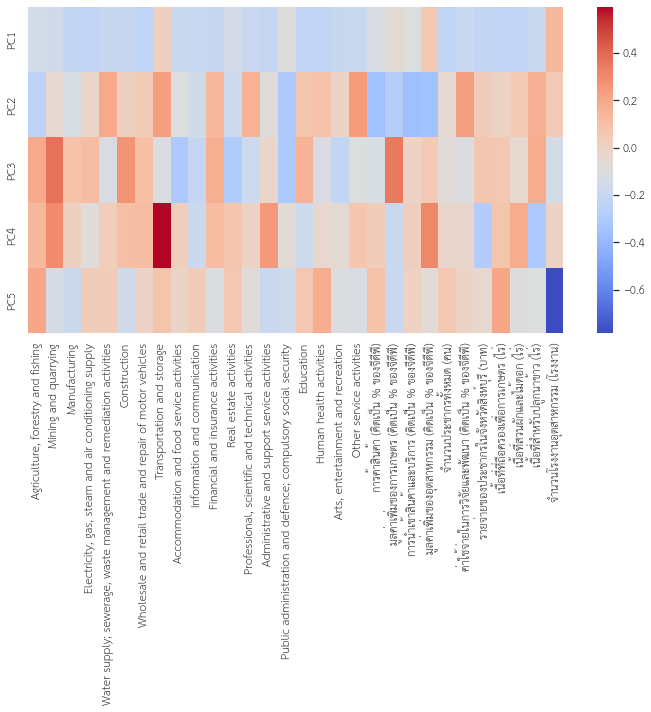

In [58]:
temp_df3 = pd.DataFrame(pca5.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')